<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

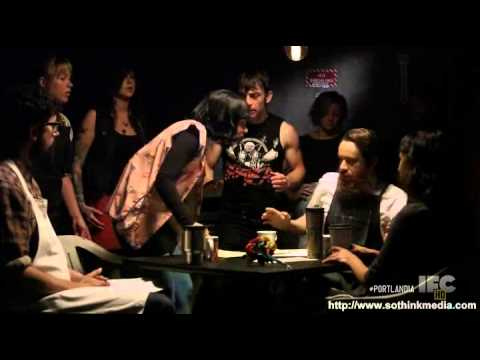

In [20]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [21]:
%pwd

'/Users/blakelobato/repos/nlp_4_1/module1-text-data'

In [22]:
"""
Import Statements
"""

# Base
from collections import Counter
import re
 
import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

nlp = spacy.load("en_core_web_lg")

In [23]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [24]:
# Start here 

In [25]:
# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [26]:
shops.shape

(7616, 3)

In [27]:
#clean the data - delete the date in full review text, make it all lower case, change star rating to integers

#remove dates at the beginning of each
shops['full_review_text'] = shops['full_review_text'].apply(lambda x: re.sub('\d+\/\d+\/\d+', '', x))

#removes the 1 at some reviews as well as starts on letters
shops['full_review_text'] = shops['full_review_text'].apply(lambda x: re.sub('^.*?([A-Z])', '\\1', x))

#makes it lower case
shops['full_review_text'] = shops['full_review_text'].apply(lambda x: x.lower())

# Convert rating to integer
shops['star_rating'] = shops['star_rating'].apply(lambda x: int(x[1]))

shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,love love loved the atmosphere! every corner o...,5
1,The Factory - Cafe With a Soul,"listed in date night: austin, ambiance in aust...",4
2,The Factory - Cafe With a Soul,listed in brunch spots i loved the eclectic an...,4
3,The Factory - Cafe With a Soul,very cool decor! good drinks nice seating how...,2
4,The Factory - Cafe With a Soul,they are located within the northcross mall sh...,4


In [28]:
nlp.Defaults.stop_words

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron

In [29]:
STOP_WORDS = nlp.Defaults.stop_words.union(['coffee', 'im', 'ive', 'place', 'come', 'definitely', 'order'])

In [30]:
# Tokenizer pipe removing stop words, blank words, and lemmatizing
tokens = []

for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    for token in doc:
        if (token.lemma_ not in STOP_WORDS) & (token.text != ' '):
            doc_tokens.append(token.lemma_)

    tokens.append(doc_tokens)

shops['tokens'] = tokens
shops['tokens'].head()

0    [love, love, love, atmosphere!, corner, shop, ...
1    [list, date, night:, austin,, ambiance, austin...
2    [list, brunch, spot, love, eclectic, homey, pl...
3    [cool, decor!, good, drink, nice, seat, howeve...
4    [locate, northcross, mall, shop, center, face,...
Name: tokens, dtype: object

In [31]:
# Create a count function
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [32]:
# Create a word count dataframe
wc = count(shops['tokens'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
150,good,2508,3516,1.0,0.009654,0.009654,0.329307
117,great,2453,3267,2.0,0.008971,0.018625,0.322085
164,like,2170,3150,3.0,0.008649,0.027275,0.284926
233,it's,2059,3115,4.0,0.008553,0.035828,0.270352
8,love,1745,2235,5.0,0.006137,0.041965,0.229123


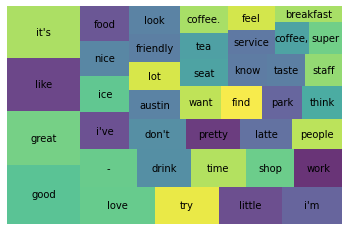

In [33]:
# Graph the word count
wc_top20 = wc[wc['rank'] <= 40]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [38]:
# Check top words for 4 and 5 ratings
shops_w4 = shops[shops['star_rating'] >= 4]
good_count = count(shops_w4['tokens'])
good_count.head(10)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
117,great,2185,2917,1.0,0.010289,0.010289,0.355863
187,good,1999,2788,2.0,0.009834,0.020124,0.325570
202,it's,1645,2498,3.0,0.008811,0.028935,0.267915
210,like,1595,2258,4.0,0.007965,0.036900,0.259772
8,love,1543,1991,5.0,0.007023,0.043923,0.251303
62,try,1238,1548,6.0,0.005460,0.049383,0.201629
219,little,1231,1512,7.0,0.005333,0.054717,0.200489
134,-,727,1431,8.0,0.005048,0.059765,0.118404
259,i'm,1077,1375,9.0,0.004850,0.064615,0.175407
11,drink,975,1254,10.0,0.004423,0.069038,0.158795


In [39]:
# Check top words for 1-3 ratings
shops_w3 = shops[shops['star_rating'] <= 4]
bad_count = count(shops_w3['tokens'])
bad_count.head(10)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
118,good,1414,2034,1.0,0.010018,0.010018,0.368613
132,like,1321,1957,2.0,0.009639,0.019657,0.344369
204,it's,1106,1689,3.0,0.008319,0.027976,0.288321
84,great,1055,1390,4.0,0.006846,0.034822,0.275026
220,little,890,1140,5.0,0.005615,0.040437,0.232013
29,try,868,1091,6.0,0.005374,0.045810,0.226277
102,-,531,1061,7.0,0.005226,0.051036,0.138425
260,i'm,769,1022,8.0,0.005034,0.056070,0.200469
95,drink,717,1005,9.0,0.004950,0.061020,0.186913
576,time,724,963,10.0,0.004743,0.065763,0.188738


## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [40]:
def bad_counter(w):
    if w in bad_count['word'].values:
      bad_pct = bad_count.loc[bad_count['word'] == w, 'appears_in_pct'].item()
    else:
      bad_pct = 0
    
    return bad_pct

good_count['bad_appears_in_pct'] = good_count.apply(lambda x: bad_counter(x['word']), axis=1)

good_count.head(10)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct,bad_appears_in_pct
117,great,2185,2917,1.0,0.010289,0.010289,0.355863,0.275026
187,good,1999,2788,2.0,0.009834,0.020124,0.325570,0.368613
202,it's,1645,2498,3.0,0.008811,0.028935,0.267915,0.288321
210,like,1595,2258,4.0,0.007965,0.036900,0.259772,0.344369
8,love,1543,1991,5.0,0.007023,0.043923,0.251303,0.178050
62,try,1238,1548,6.0,0.005460,0.049383,0.201629,0.226277
219,little,1231,1512,7.0,0.005333,0.054717,0.200489,0.232013
134,-,727,1431,8.0,0.005048,0.059765,0.118404,0.138425
259,i'm,1077,1375,9.0,0.004850,0.064615,0.175407,0.200469
11,drink,975,1254,10.0,0.004423,0.069038,0.158795,0.186913


In [41]:
good_count['appears_in_diff'] = good_count['appears_in_pct'] - good_count['bad_appears_in_pct']

good_count.head(10)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct,bad_appears_in_pct,appears_in_diff
117,great,2185,2917,1.0,0.010289,0.010289,0.355863,0.275026,0.080837
187,good,1999,2788,2.0,0.009834,0.020124,0.325570,0.368613,-0.043043
202,it's,1645,2498,3.0,0.008811,0.028935,0.267915,0.288321,-0.020406
210,like,1595,2258,4.0,0.007965,0.036900,0.259772,0.344369,-0.084597
8,love,1543,1991,5.0,0.007023,0.043923,0.251303,0.178050,0.073253
62,try,1238,1548,6.0,0.005460,0.049383,0.201629,0.226277,-0.024649
219,little,1231,1512,7.0,0.005333,0.054717,0.200489,0.232013,-0.031524
134,-,727,1431,8.0,0.005048,0.059765,0.118404,0.138425,-0.020022
259,i'm,1077,1375,9.0,0.004850,0.064615,0.175407,0.200469,-0.025062
11,drink,975,1254,10.0,0.004423,0.069038,0.158795,0.186913,-0.028119


In [42]:
# The top 10 words for good shops
good_count.sort_values(by=['appears_in_diff'], ascending=False)[:10]

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct,bad_appears_in_pct,appears_in_diff
117,great,2185,2917,1.0,0.010289,0.010289,0.355863,0.275026,0.080837
8,love,1543,1991,5.0,0.007023,0.043923,0.251303,0.178050,0.073253
155,friendly,1006,1036,18.0,0.003654,0.101779,0.163844,0.116788,0.047055
766,delicious,629,664,42.0,0.002342,0.171519,0.102443,0.059176,0.043267
417,favorite,576,663,43.0,0.002339,0.173858,0.093811,0.052920,0.040891
723,amaze,387,419,100.0,0.001478,0.276713,0.063029,0.028415,0.034614
225,perfect,505,556,60.0,0.001961,0.209982,0.082248,0.054745,0.027503
584,awesome,345,388,111.0,0.001369,0.292085,0.056189,0.029718,0.026470
197,super,669,765,35.0,0.002698,0.154291,0.108958,0.084463,0.024495
589,austin.,473,502,71.0,0.001771,0.230148,0.077036,0.055266,0.021770


In [45]:
# The top 10 words for bad shops
good_count.sort_values(by=['appears_in_diff'])[:10]

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct,bad_appears_in_pct,appears_in_diff
210,like,1595,2258,4.0,0.007965,0.036900,0.259772,0.344369,-0.084597
31,pretty,791,993,21.0,0.003503,0.112453,0.128827,0.188999,-0.060172
252,don't,793,965,22.0,0.003404,0.115857,0.129153,0.184567,-0.055414
216,didn't,423,482,77.0,0.001700,0.240458,0.068893,0.115485,-0.046592
187,good,1999,2788,2.0,0.009834,0.020124,0.325570,0.368613,-0.043043
136,wasn't,257,296,148.0,0.001044,0.334943,0.041857,0.084463,-0.042606
198,think,630,767,34.0,0.002706,0.151593,0.102606,0.144943,-0.042337
112,maybe,175,194,237.0,0.000684,0.407911,0.028502,0.067258,-0.038756
1256,ask,289,318,134.0,0.001122,0.319786,0.047068,0.085766,-0.038698
130,bite,529,605,51.0,0.002134,0.191569,0.086156,0.120959,-0.034803


MARKDOWN


The data shows that shops with ratings of 4 or greaater have a higher amount of words with postiive connotations such as good, great, delicious, favorite, etc.

The data also shows that resturants with lower star ratings have negative words like "don't", "wasn't", & "didn't". All thee were understandable for the type of service.

This helps to understand why these restaurants have lower ratings and why they have higher ratings with better sounding words.



## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

